In [1]:
import pandas as pd
import glob
import numpy as np
import itertools
from tqdm import tqdm
from sklearn.svm import OneClassSVM
import random
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [2]:
datasets = {}
keys = [name.split('_')[1].split('.')[0] for name in glob.glob1('../data/pickle_datasets/','*.pkl')]
values = [pd.read_pickle(path).sample(10000) for path in glob.glob('../data/pickle_datasets/*.pkl')]
values = [{'data':value.drop('target',axis=1),'target':value.target.values} for value in values]
datasets.update(zip(keys,values))

print datasets.keys()

['shuttle', 'covtype', 'http', 'sf', 'creditcard']


In [3]:
classifiers = {}
gammas = np.arange(0.005,0.05,0.01)
nus = np.arange(0.005,0.4,0.05)

for nu, gamma in itertools.product(*[nus,gammas]):
    classifiers.update({'OCSVM__{nu}__{gamma}'.format(nu=nu,gamma=gamma):OneClassSVM(nu=nu,gamma=gamma)})


#for name, dataset in datasets.iteritems():
name = 'shuttle'
dataset = datasets['shuttle']
cols_inds = {}
nb_col = int(0.8*len(dataset['data'].columns))
print 'fitting on {name}'.format(name=name)

for i, (clf_name, clf)  in enumerate(tqdm(classifiers.items())):
    print 'classifieur {name}'.format(name=clf_name)
    col_ind = random.sample(range(len(dataset['data'].columns)), nb_col) 
    cols_inds.update({clf_name:col_ind})
    clf.fit(dataset['data'].iloc[:,col_ind])

  0%|          | 0/40 [00:00<?, ?it/s]

fitting on shuttle
classifieur OCSVM__0.005__0.015
classifieur OCSVM__0.105__0.005


 10%|█         | 4/40 [00:01<00:11,  3.14it/s]

classifieur OCSVM__0.005__0.025
classifieur OCSVM__0.005__0.035
classifieur OCSVM__0.255__0.045


 12%|█▎        | 5/40 [00:03<00:26,  1.34it/s]

classifieur OCSVM__0.205__0.005


 15%|█▌        | 6/40 [00:06<00:34,  1.02s/it]

classifieur OCSVM__0.205__0.015


 18%|█▊        | 7/40 [00:08<00:40,  1.24s/it]

classifieur OCSVM__0.355__0.005


 20%|██        | 8/40 [00:13<00:53,  1.69s/it]

classifieur OCSVM__0.005__0.005
classifieur OCSVM__0.155__0.035


 25%|██▌       | 10/40 [00:15<00:45,  1.51s/it]

classifieur OCSVM__0.255__0.035


 28%|██▊       | 11/40 [00:17<00:46,  1.60s/it]

classifieur OCSVM__0.255__0.025


 30%|███       | 12/40 [00:20<00:46,  1.67s/it]

classifieur OCSVM__0.005__0.045
classifieur OCSVM__0.105__0.045


 35%|███▌      | 14/40 [00:21<00:39,  1.51s/it]

classifieur OCSVM__0.155__0.005


 38%|███▊      | 15/40 [00:22<00:37,  1.51s/it]

classifieur OCSVM__0.155__0.015


 40%|████      | 16/40 [00:24<00:36,  1.51s/it]

classifieur OCSVM__0.155__0.045


 42%|████▎     | 17/40 [00:25<00:34,  1.51s/it]

classifieur OCSVM__0.105__0.015


 45%|████▌     | 18/40 [00:26<00:32,  1.49s/it]

classifieur OCSVM__0.105__0.035


 48%|████▊     | 19/40 [00:27<00:30,  1.46s/it]

classifieur OCSVM__0.055__0.045


 50%|█████     | 20/40 [00:28<00:28,  1.42s/it]

classifieur OCSVM__0.155__0.025


 52%|█████▎    | 21/40 [00:29<00:27,  1.42s/it]

classifieur OCSVM__0.055__0.015


 55%|█████▌    | 22/40 [00:30<00:24,  1.38s/it]

classifieur OCSVM__0.055__0.005


 57%|█████▊    | 23/40 [00:30<00:22,  1.35s/it]

classifieur OCSVM__0.255__0.015


 60%|██████    | 24/40 [00:33<00:22,  1.39s/it]

classifieur OCSVM__0.105__0.025


 62%|██████▎   | 25/40 [00:34<00:20,  1.38s/it]

classifieur OCSVM__0.305__0.045


 65%|██████▌   | 26/40 [00:37<00:20,  1.43s/it]

classifieur OCSVM__0.305__0.035


 68%|██████▊   | 27/40 [00:40<00:19,  1.49s/it]

classifieur OCSVM__0.355__0.015


 70%|███████   | 28/40 [00:43<00:18,  1.56s/it]

classifieur OCSVM__0.255__0.005


 72%|███████▎  | 29/40 [00:46<00:17,  1.59s/it]

classifieur OCSVM__0.305__0.005


 75%|███████▌  | 30/40 [00:49<00:16,  1.64s/it]

classifieur OCSVM__0.055__0.035


 78%|███████▊  | 31/40 [00:49<00:14,  1.61s/it]

classifieur OCSVM__0.055__0.025


 80%|████████  | 32/40 [00:50<00:12,  1.57s/it]

classifieur OCSVM__0.355__0.025


 82%|████████▎ | 33/40 [00:54<00:11,  1.65s/it]

classifieur OCSVM__0.355__0.035


 85%|████████▌ | 34/40 [00:58<00:10,  1.72s/it]

classifieur OCSVM__0.205__0.045


 88%|████████▊ | 35/40 [01:00<00:08,  1.73s/it]

classifieur OCSVM__0.205__0.025


 90%|█████████ | 36/40 [01:02<00:06,  1.74s/it]

classifieur OCSVM__0.305__0.025


 92%|█████████▎| 37/40 [01:05<00:05,  1.77s/it]

classifieur OCSVM__0.305__0.015


 95%|█████████▌| 38/40 [01:08<00:03,  1.80s/it]

classifieur OCSVM__0.205__0.035


 98%|█████████▊| 39/40 [01:10<00:01,  1.81s/it]

classifieur OCSVM__0.355__0.045


100%|██████████| 40/40 [01:14<00:00,  1.86s/it]


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scores = pd.DataFrame()
for name, classif in classifiers.iteritems():
    dfunc = -classif.decision_function(dataset['data'].iloc[:,cols_inds[name]])
    scaler.fit(dfunc)
    df_scores['score_{name}'.format(name=name)] = pd.Series(scaler.transform(dfunc).flatten())
    
df_scores['pred'] = df_scores.mean(axis=1)

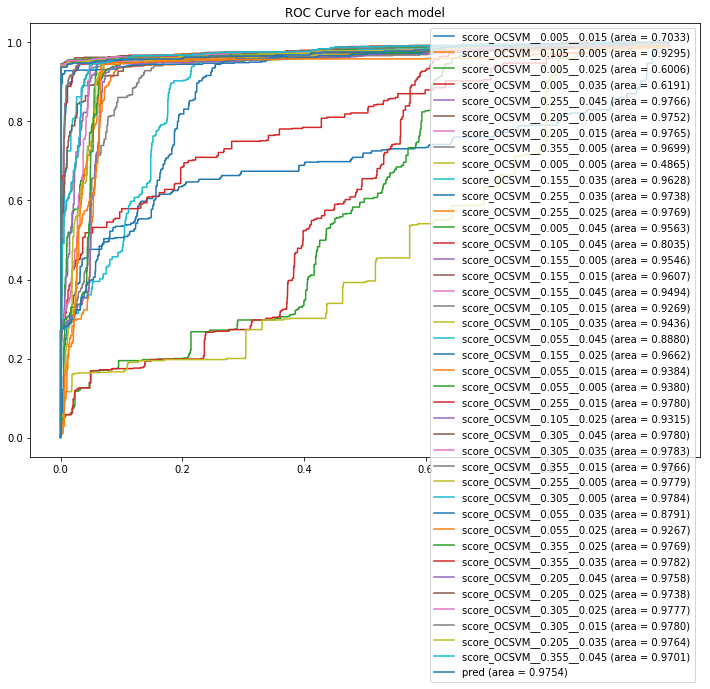

In [5]:
plt.figure(figsize=(12,8))
rocs = []
for col in df_scores.columns.tolist():
    fpr, tpr, thresholds = roc_curve(dataset['target'], df_scores[col])
    roc_auc = auc(fpr, tpr) # this generates ValueError[1]
    rocs.append(roc_auc)
    plt.plot(fpr, tpr, label=col +' (area = %0.4f)' % roc_auc)
    
plt.title('ROC Curve for each model')
plt.legend()
plt.show()

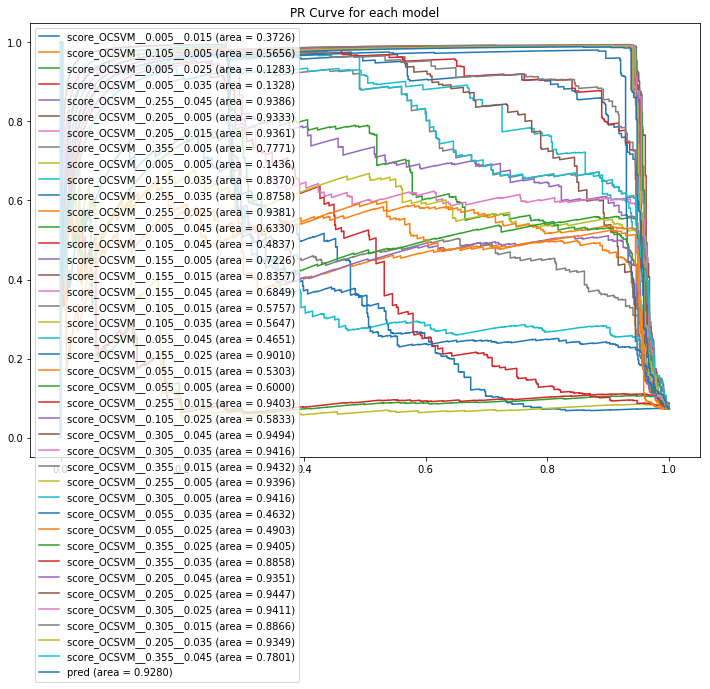

In [6]:
plt.figure(figsize=(12,8))
rocs = []
for col in df_scores.columns.tolist():
    precision, recall, thresholds = precision_recall_curve(dataset['target'], df_scores[col])
    roc_auc = auc(recall, precision,reorder=True) 
    rocs.append(roc_auc)
    plt.plot(recall, precision, label=col +' (area = %0.4f)' % roc_auc)
    
plt.title('PR Curve for each model')
plt.legend()
plt.show()

In [7]:
def mv(axis_alpha, volume_support, s_unif, s_X, n_generated):
    n_samples = s_X.shape[0]
    s_X_argsort = s_X.argsort()
    mass = 0
    cpt = 0
    u = s_X[s_X_argsort[-1]]
    mv = np.zeros(axis_alpha.shape[0])
    for i in range(axis_alpha.shape[0]):
        # pdb.set_trace()
        while mass < axis_alpha[i]:
            cpt += 1
            u = s_X[s_X_argsort[-cpt]]
            mass = 1. / n_samples * cpt  # sum(s_X > u)
        mv[i] = float((s_unif >= u).sum()) / n_generated * volume_support
    return auc(axis_alpha, mv), mv


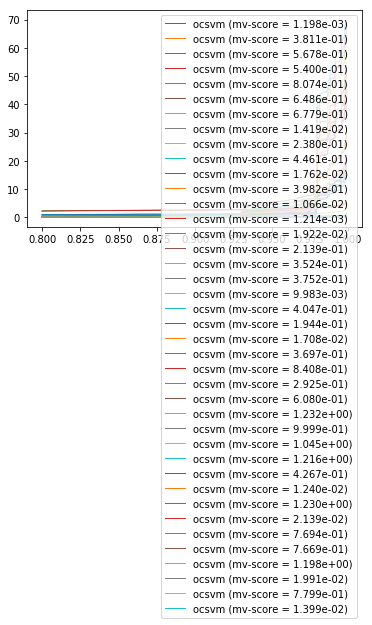

In [30]:
n_generated = 100000
alpha_min = 0.8
alpha_max = 0.999
t_max = 0.09
n_features = len(dataset['data'].columns)
lim_inf = dataset['data'].min(axis=0)
lim_sup = dataset['data'].max(axis=0)
volume_support = (lim_sup - lim_inf).prod()
t = np.arange(0, 100 / volume_support, 0.01 / volume_support)
axis_alpha = np.arange(alpha_min, alpha_max, 0.0001)
unif = np.random.uniform(lim_inf, lim_sup, size=(n_generated, n_features))

mvs = []

for name, classif in classifiers.iteritems():
    s_X_ocsvm = classif.decision_function(dataset['data'].iloc[:,cols_inds[name]]).reshape(1, -1)[0]
    s_unif_ocsvm = classif.decision_function(unif[:,cols_inds[name]]).reshape(1, -1)[0]
    auc_ocsvm, mv_ocsvm = mv(axis_alpha, volume_support, s_unif_ocsvm, s_X_ocsvm, n_generated)
    plt.plot(axis_alpha, mv_ocsvm, lw=1,label='%s (mv-score = %0.3e)'% ('ocsvm', auc_ocsvm))
    mvs.append(auc_ocsvm)

plt.legend()
plt.show()

ValueError: x and y must be the same size

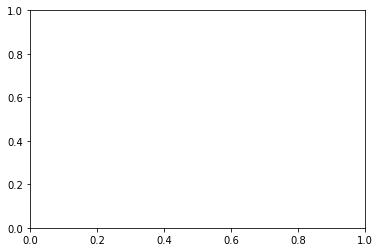

In [32]:
plt.scatter(np.array(mvs),np.array(rocs[:len(mvs)-1]))

In [35]:
dff = pd.DataFrame()
dff['mv'] = mvs
dff['roc'] = rocs[:len(mvs)]

,mv,roc
mv,1.000000,0.441241
roc,0.441241,1.000000


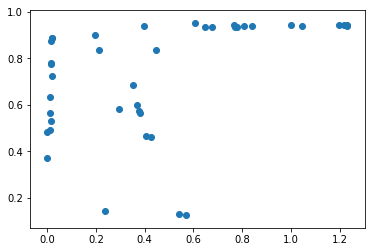

In [37]:
plt.scatter(dff.query().mv,dff.roc)
dff.corr()

In [34]:
rocs

[0.3725961175843624,
 0.56557793984691063,
 0.12831247512958394,
 0.13283471816084655,
 0.93861432777319409,
 0.93328134434125809,
 0.9361455235350824,
 0.77713805495239963,
 0.14359371547452132,
 0.83704331230709506,
 0.8757922973915766,
 0.93806878825325946,
 0.63297868664923607,
 0.4837006912332476,
 0.72257949507909291,
 0.83571343095216566,
 0.68489778663644707,
 0.5756851692713808,
 0.56471091533951567,
 0.46512068978825938,
 0.9009897028874978,
 0.53031854427063818,
 0.59999665170925776,
 0.94034746176424822,
 0.58330093654013715,
 0.94944652379127203,
 0.94160237320053275,
 0.94316647122783714,
 0.93958016517394083,
 0.94163506615832282,
 0.46323098649371131,
 0.49032870053971733,
 0.94047097742124508,
 0.88582508719421971,
 0.93508042199127284,
 0.94468713524546966,
 0.94108960458896307,
 0.88661269869186632,
 0.93488545825313485,
 0.78006459642326753,
 0.92801831695863946]